# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Labelled_12K_Manual_DBSCAN_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['Type 1'].value_counts().index)
        counts = list(df_copy['Type 1'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    print("Number of Clusters:", c.size)
    c = malicious_df['cluster'].value_counts(ascending=True)
    print("Number of single-item Clusters:", c[c==1].count())

## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,6,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,8,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,9,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(42797, 6)

<Axes: ylabel='Type 1'>

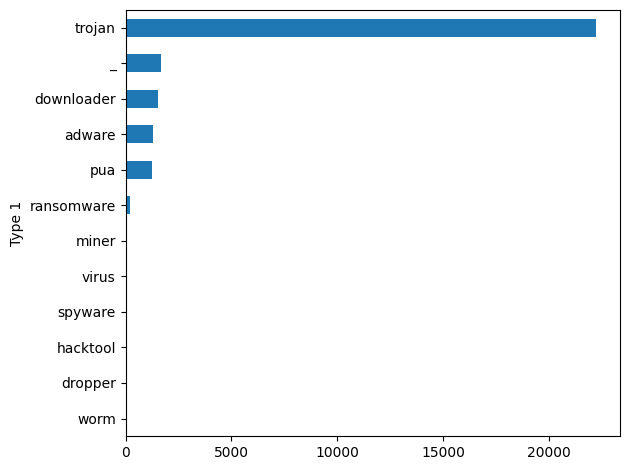

In [14]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [15]:
#Inject pattern (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

#Drop row that is falsely labelled. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

In [16]:
# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT
# unique_clusters = get_unique_clusters(malicious_df)
# for u in unique_clusters:
#     if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
#         malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
# malicious_df.head()

## How many clusters are there?

In [17]:
how_many_clusters()

Number of Clusters: 11959
Number of single-item Clusters: 9923


In [18]:
#DROP ROWS WITH NA TO HAVE CLEAN CLUSTERS
import numpy as nan
malicious_df.dropna(inplace=True, subset=['Type 1'])
malicious_df['Type 1'].unique()

array(['trojan', 'pua', 'downloader', 'adware', 'hacktool', 'miner',
       'virus', 'spyware', 'ransomware', 'dropper', 'worm'], dtype=object)

In [19]:
how_many_clusters()

Number of Clusters: 8031
Number of single-item Clusters: 6703


## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

Type 1
trojan        22224
downloader     1523
adware         1293
pua            1240
ransomware      228
miner            90
virus            55
spyware          33
hacktool          9
dropper           4
worm              1
Name: count, dtype: int64

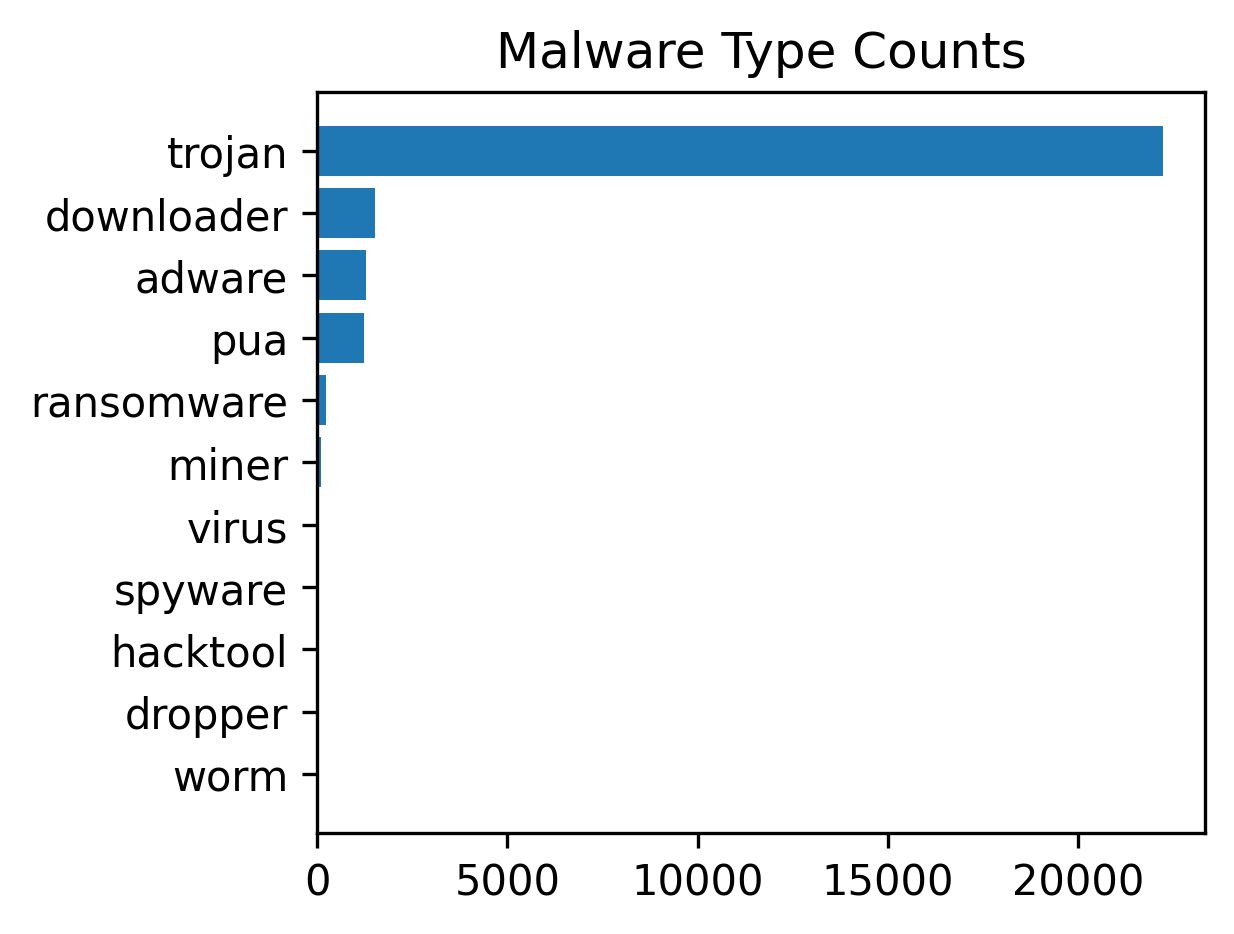

In [20]:
output = malicious_df['Type 1'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [21]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 0: trojan (2149); spyware (1); adware (1); 
CLUSTER 1: pua (60); trojan (18); adware (5); downloader (4); 
CLUSTER 2: trojan (6); 
CLUSTER 3: trojan (1); 
CLUSTER 4: trojan (1); 
CLUSTER 5: trojan (1); 
CLUSTER 6: downloader (99); trojan (9); adware (3); virus (1); 
CLUSTER 7: adware (1); 
CLUSTER 8: trojan (265); adware (25); pua (1); 
CLUSTER 9: downloader (621); pua (61); adware (15); trojan (12); 
CLUSTER 10: trojan (9); adware (3); virus (2); downloader (2); pua (2); hacktool (1); 
CLUSTER 11: trojan (9); 
CLUSTER 12: trojan (1); 
CLUSTER 13: trojan (232); adware (5); pua (1); 
CLUSTER 16: trojan (16); 
CLUSTER 17: trojan (9); 
CLUSTER 18: trojan (1); 
CLUSTER 19: trojan (452); adware (15); pua (2); 
CLUSTER 20: trojan (2); 
CLUSTER 21: trojan (342); adware (39); pua (2); 
CLUSTER 22: trojan (1); 
CLUSTER 23: trojan (95); downloader (71); pua (30); adware (23); dropper (1); 
CLUSTER 24: trojan (681); adware (7); spyware (2); 
CLUSTER 25: trojan (22); 
CLUSTER 26: trojan (2

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [22]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount.csv", index=False)

# of Unique Malware Type: 11

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 7113
Matching Clusters: [0, 2, 3, 4, 5, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 30, 35, 36, 37, 38, 39, 40, 41, 42, 43, 29, 44, 46, 47, 49, 50, 51, 52, 53, 54, 55, 8, 56, 57, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 1, 74, 75, 76, 78, 79, 80, 81, 83, 84, 85, 86, 88, 89, 90, 91, 92, 94, 96, 58, 100, 102, 103, 104, 105, 106, 107, 108, 110, 111, 113, 114, 115, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 33, 160, 161, 163, 164, 165, 167, 168, 169, 171, 172, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 97, 188, 189, 190, 192, 193, 194, 195, 197, 198, 199, 200, 202, 203, 205, 209, 210, 211, 213, 214, 215, 216, 217, 219, 220, 222, 223, 225, 226, 227, 230, 231, 233, 234, 236, 237, 238, 239, 240, 241, 242, 243, 245, 247, 2

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
10,trojan,7113,"[0, 2, 3, 4, 5, 11, 12, 13, 16, 17, 18, 19, 20..."
8,adware,585,"[7, 8, 58, 93, 23, 112, 116, 143, 166, 170, 17..."
7,pua,486,"[1, 28, 31, 33, 48, 97, 98, 113, 159, 162, 29,..."
9,downloader,85,"[6, 9, 29, 34, 23, 45, 73, 82, 109, 158, 218, ..."
5,miner,59,"[87, 221, 275, 285, 945, 108, 50, 1714, 2005, ..."
4,virus,48,"[95, 371, 447, 637, 6, 801, 1012, 1195, 1247, ..."
6,ransomware,27,"[204, 207, 197, 384, 741, 1677, 1753, 1857, 18..."
3,spyware,13,"[101, 0, 24, 210, 653, 3649, 3996, 1715, 5030,..."
2,hacktool,8,"[10, 511, 1380, 1341, 1299, 8308, 12449, 11667]"
1,dropper,3,"[302, 23, 2199]"


## "What the API Calls are in each Malware Type"

In [23]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               365783
LdrLoadDll                           217396
LdrGetDllHandle                      145284
RegOpenKeyExW                        137475
LoadResource                         114707
FindResourceExW                      112474
NtClose                              107156
RegQueryValueExW                      97565
RegCloseKey                           88941
NtAllocateVirtualMemory               83520
NtQueryValueKey                       53352
NtOpenKey                             52482
GetSystemMetrics                      47649
GetSystemTimeAsFileTime               40557
SetErrorMode                          23650
GetSystemInfo                         21172
NtProtectVirtualMemory                18482
NtDelayExecution                      17813
RegQueryInfoKeyW                      17102
NtCreateFile                          15794
DrawTextExW                           15495
LoadStringW                           15182
NtFreeVirtualMemory      

adware
LdrGetProcedureAddress               21715
LdrLoadDll                           12462
LdrGetDllHandle                      10768
NtClose                               7625
RegOpenKeyExW                         7336
RegCloseKey                           6512
NtAllocateVirtualMemory               5772
RegQueryValueExW                      5370
SetErrorMode                          3660
NtOpenKey                             3168
NtQueryValueKey                       2944
GetSystemTimeAsFileTime               2133
NtCreateFile                          2004
GetSystemWindowsDirectoryW            1741
GetSystemDirectoryW                   1676
LoadResource                          1546
NtMapViewOfSection                    1492
GetSystemMetrics                      1379
NtReadFile                            1318
NtFreeVirtualMemory                   1309
RegOpenKeyExA                         1309
FindResourceExW                       1230
NtCreateSection                       1152
SetF

pua
LdrGetProcedureAddress               23346
LdrLoadDll                           12614
LdrGetDllHandle                      12016
NtClose                               7739
NtAllocateVirtualMemory               6366
RegOpenKeyExW                         5263
RegCloseKey                           4806
RegQueryValueExW                      3486
SetErrorMode                          3466
NtOpenKey                             2736
NtQueryValueKey                       2539
GetSystemMetrics                      2007
NtReadFile                            1926
SetFilePointer                        1885
NtCreateFile                          1876
LoadResource                          1674
NtFreeVirtualMemory                   1601
GetSystemWindowsDirectoryW            1569
NtMapViewOfSection                    1559
FindResourceExW                       1553
GetSystemDirectoryW                   1427
GetSystemTimeAsFileTime               1373
NtProtectVirtualMemory                1201
NtCreat

downloader
LdrGetProcedureAddress               40941
LdrGetDllHandle                      26372
LdrLoadDll                           13350
RegCloseKey                           9023
RegOpenKeyExW                         7963
NtAllocateVirtualMemory               7272
RegQueryValueExW                      6029
NtClose                               5817
FindResourceExW                       4191
LoadResource                          4175
RegOpenKeyExA                         2453
GetSystemTimeAsFileTime               1977
NtOpenKey                             1868
NtQueryValueKey                       1744
RegQueryValueExA                      1716
NtFreeVirtualMemory                   1654
GetSystemMetrics                      1339
GetSystemWindowsDirectoryW            1332
SetErrorMode                          1124
NtMapViewOfSection                    1010
SetUnhandledExceptionFilter            886
LoadStringW                            873
NtCreateFile                           796


miner
LdrGetProcedureAddress               843
NtClose                              737
LdrLoadDll                           510
LdrGetDllHandle                      413
NtCreateFile                         353
RegOpenKeyExW                        353
NtQueryAttributesFile                353
RegCloseKey                          326
NtAllocateVirtualMemory              315
NtMapViewOfSection                   288
NtCreateSection                      272
RegQueryValueExW                     257
NtUnmapViewOfSection                 234
NtOpenKey                            220
NtReadFile                           216
SetFilePointer                       203
NtQueryValueKey                      190
GetSystemWindowsDirectoryW           163
LoadResource                         161
GetSystemTimeAsFileTime              152
LdrUnloadDll                         148
GetSystemDirectoryW                  147
GetSystemInfo                        128
FindResourceExW                      100
NtFreeVirt

virus
LdrGetProcedureAddress               725
LdrLoadDll                           438
NtClose                              423
RegCloseKey                          310
LdrGetDllHandle                      292
RegOpenKeyExW                        273
NtReadFile                           269
NtAllocateVirtualMemory              243
NtWriteFile                          201
RegQueryValueExW                     188
NtOpenKey                            129
NtCreateFile                         124
LoadResource                         124
FindResourceExW                      122
NtQueryValueKey                      116
SetFilePointer                       103
NtFreeVirtualMemory                   77
RegOpenKeyExA                         75
GetSystemWindowsDirectoryW            71
SetErrorMode                          70
GetSystemMetrics                      62
NtMapViewOfSection                    62
FindFirstFileExW                      49
NtCreateSection                       47
NtDuplicat

ransomware
NtQuerySystemInformation      5297
NtAllocateVirtualMemory       3656
NtFreeVirtualMemory           3285
NtClose                       1445
LdrGetProcedureAddress         949
RegOpenKeyExW                  754
RegCloseKey                    739
RegQueryValueExW               736
NtOpenKey                      547
NtQueryValueKey                493
LdrLoadDll                     477
LdrGetDllHandle                468
NtCreateFile                   457
NtMapViewOfSection             425
NtCreateSection                424
CreateThread                   304
NtCreateMutant                 231
NtOpenFile                     229
CryptAcquireContextW           222
NtQueryInformationFile         221
GetSystemWindowsDirectoryW     220
NtDelayExecution               213
GetFileSize                    210
GetTempPathW                   209
CreateToolhelp32Snapshot        90
Process32NextW                  83
Process32FirstW                 83
NtWriteFile                     33
GetFileAt

spyware
LdrGetProcedureAddress               530
FindResourceExW                      420
LoadResource                         370
LdrGetDllHandle                      278
LdrLoadDll                           267
NtClose                              152
GetSystemMetrics                     144
NtAllocateVirtualMemory              141
RegCloseKey                           94
LoadStringA                           82
NtQueryValueKey                       71
NtOpenKey                             64
RegOpenKeyExA                         62
RegOpenKeyExW                         54
DrawTextExW                           47
NtCreateFile                          34
RegQueryValueExW                      32
RegQueryValueExA                      32
NtCreateSection                       32
GetSystemInfo                         31
GetSystemWindowsDirectoryW            30
NtMapViewOfSection                    28
GetSystemDirectoryW                   28
NtFreeVirtualMemory                   26
NtQueryA

hacktool
NtClose                        123
LdrGetProcedureAddress          87
LdrLoadDll                      61
FindFirstFileExW                48
NtAllocateVirtualMemory         44
NtCreateFile                    37
LdrGetDllHandle                 35
SetFilePointer                  29
NtReadFile                      28
RegCloseKey                     27
NtQueryValueKey                 21
RegOpenKeyExW                   21
SetErrorMode                    19
NtMapViewOfSection              19
NtOpenKey                       19
NtFreeVirtualMemory             18
RegQueryValueExW                17
GetSystemMetrics                16
GetSystemDirectoryW             15
NtCreateSection                 14
NtQueryAttributesFile           13
NtOpenFile                      12
GetSystemWindowsDirectoryW      11
RegOpenKeyExA                   11
NtWriteFile                      9
GetFileSize                      9
LoadResource                     7
LoadStringA                      7
CreateDirec

dropper
LdrGetProcedureAddress               51
LdrLoadDll                           45
SetErrorMode                         34
RegOpenKeyExW                        32
RegCloseKey                          29
LdrGetDllHandle                      29
NtClose                              27
RegQueryValueExW                     25
NtOpenKey                            14
NtQueryValueKey                      14
GetSystemWindowsDirectoryW           13
NtAllocateVirtualMemory              12
GetSystemDirectoryW                   9
NtCreateFile                          7
NtMapViewOfSection                    6
NtQueryAttributesFile                 6
LoadStringW                           6
NtCreateSection                       5
NtCreateMutant                        4
GetNativeSystemInfo                   4
RegOpenKeyExA                         3
NtFreeVirtualMemory                   3
GetSystemTimeAsFileTime               3
CreateActCtxW                         3
SetUnhandledExceptionFilter     

worm
SetErrorMode               21
LdrGetProcedureAddress     15
LdrLoadDll                 13
NtAllocateVirtualMemory    10
GetFileAttributesW          4
NtQueryValueKey             4
NtClose                     3
LoadStringA                 3
NtDelayExecution            3
RegOpenKeyExA               3
NtProtectVirtualMemory      3
LdrGetDllHandle             3
GetSystemMetrics            3
FindResourceExW             2
NtOpenKey                   1
SearchPathW                 1
GetSystemInfo               1
NtFreeVirtualMemory         1
SetWindowsHookExA           1
LookupPrivilegeValueW       1
CoCreateInstanceEx          1
OleInitialize               1
NtOpenFile                  1
NtQueryInformationFile      1
Name: count, dtype: int64

## "What the Unique API Calls are in each Malware Type"

In [24]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['SetStdHandle', 'GlobalMemoryStatus', 'CryptProtectData', 'CryptEncrypt', 'GetAdaptersAddresses', 'GetBestInterfaceEx', 'GetVolumePathNameW', 'StartServiceW', 'GetFileInformationByHandle', 'GetSystemWindowsDirectoryA', 'InternetGetConnectedState', 'HttpSendRequestA', 'InternetCloseHandle', 'CreateServiceW', 'RtlRemoveVectoredExceptionHandler', 'UnhookWindowsHookEx', 'CreateRemoteThread', 'InternetQueryOptionA', 'EnumServicesStatusA', 'NtSuspendThread', 'RegisterHotKey', 'GetKeyboardState', 'RtlDecompressBuffer', 'WSASocketW', 'Module32FirstW', 'Module32NextW', 'NtQueueApcThread', 'SetFileInformationByHandle', 'GetFileInformationByHandleEx', 'GetAddrInfoW', 'DnsQuery_A', 'RegDeleteValueA', 'InternetSetStatusCallback', 'InternetReadFile', 'HttpQueryInfoA', 'ObtainUserAgentString', 'InternetOpenUrlA', 'InternetOpenUrlW', 'NetUserGetInfo']


1 adware
['RegQueryInfoKeyA', 'RegEnumKeyExA', 'GetComputerNameA', 'DrawTextExA', 'OpenServiceW', 'CryptAcquireContextA', 'HttpOpenRequestA'